In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from torchgeo.datasets import ReforesTree
ds = ReforesTree(root="../data/reforestree/", download=False, checksum=True)

In [26]:
ds[0].keys()

dict_keys(['image', 'boxes', 'label', 'agb'])

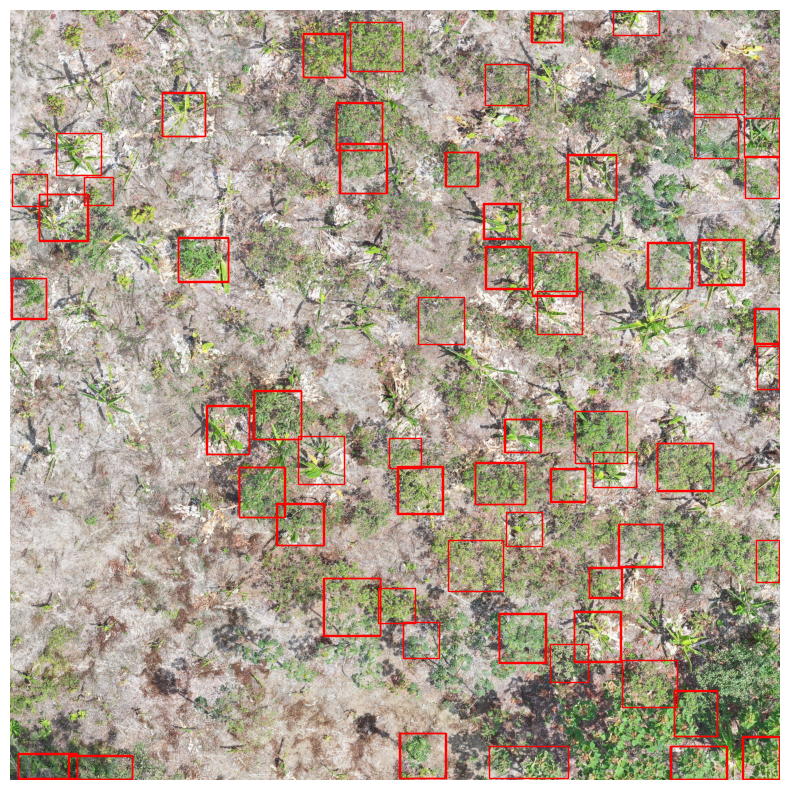

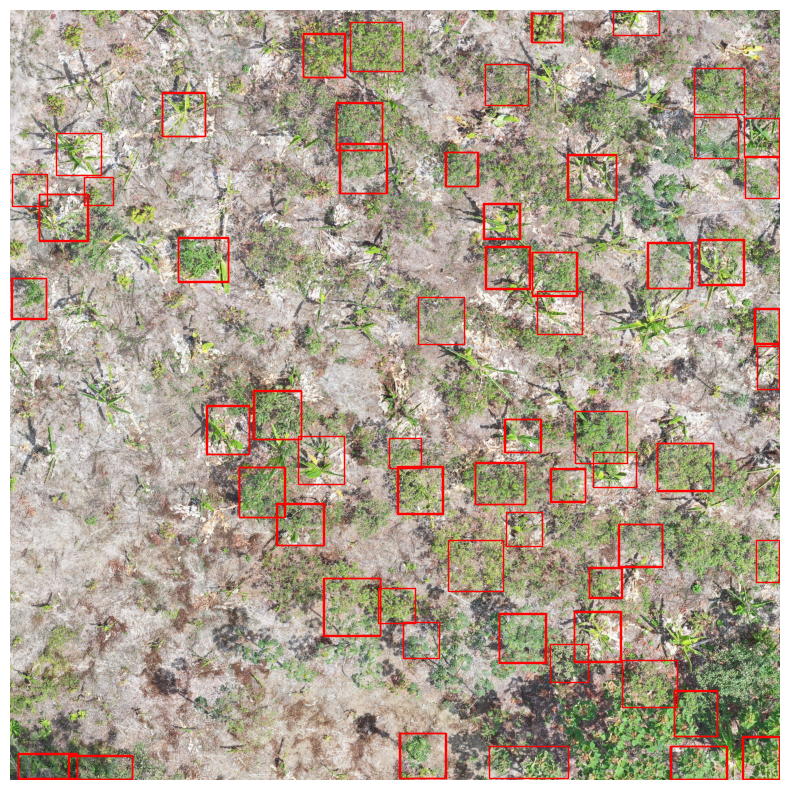

In [60]:
ds.plot(ds[1], show_titles=False)

In [54]:
print(ds[0]['boxes']) # coordinates of boxes
print(ds[0]['label']) # tree type
print(ds[0]['agb']) # agb value

tensor([[1584.5260, 3605.1919, 2002.9177, 3995.9585],
        [2576.5479, 3521.6582, 2761.1316, 3715.5154],
        [2022.0178, 3309.3467, 2396.8035, 3686.2920],
        [2595.9714, 2735.0383, 2905.9556, 3042.4167],
        [2271.8169, 3073.7432, 2495.1174, 3305.5437],
        [2862.3230, 3658.7354, 3095.2598, 3918.9004],
        [2579.5479, 3524.6582, 2759.1316, 3713.5154],
        [2025.0178, 3312.3467, 2394.8035, 3684.2920],
        [2598.9714, 2738.0383, 2903.9556, 3040.4167],
        [2274.8169, 3076.7432, 2493.1174, 3303.5437],
        [3800.3315, 2234.5310, 3986.7327, 2430.1655],
        [3475.7583, 2079.4524, 3743.1345, 2328.6021],
        [2694.6096, 3888.3972, 2903.7158, 3996.1001],
        [3877.4390, 1770.5835, 3994.6587, 2001.0277],
        [3714.0112, 2061.4800, 3872.2429, 2222.6682],
        [3416.0117, 2837.4719, 3661.4238, 3081.6174],
        [3478.7583, 2082.4524, 3741.1345, 2326.6021],
        [2697.6096, 3891.3972, 2901.7158, 3994.1001],
        [3880.4390, 1773.583

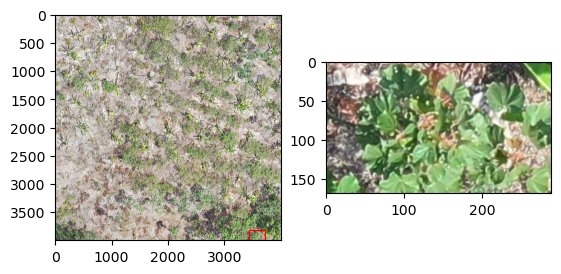

In [102]:
img_choice = 1
tree_choice = 68
img = np.moveaxis(ds[img_choice]['image'].numpy(), 0, -1)
tree1 = [int(x) for x in ds[img_choice]['boxes'].numpy()[tree_choice]]

fig, axs = plt.subplots(1,2)
axs[0].imshow(img)
tree1_rec = plt.Rectangle((tree1[0], tree1[1]), tree1[2] - tree1[0], tree1[3] - tree1[1], linewidth=1, edgecolor='r', facecolor='none')
axs[0].add_patch(tree1_rec)

axs[1].imshow(img[tree1[1]:tree1[3], tree1[0]:tree1[2]])

plt.show()

In [106]:
len(ds[img_choice]['boxes'])

97

In [109]:
from tqdm import tqdm
tree_imgs = []
for img_choice in tqdm(range(len(ds))):
    img = np.moveaxis(ds[img_choice]['image'].numpy(), 0, -1)
    for tree_choice in range(len(ds[img_choice]['boxes'])):
        tree = [int(x) for x in ds[img_choice]['boxes'].numpy()[tree_choice]]
        tree_img = img[tree[1]:tree[3], tree[0]:tree[2]]
        tree_imgs.append(tree_img)
        

  1%|          | 1/105 [00:27<48:10, 27.80s/it]


KeyboardInterrupt: 